<h2>Logistic Regression</h2><br/>
   <ul>    
    <li>Prerequisites: - a probabilistic view of classification</li>
    <li>Prerequisites: - The sigmoid function</li>
    <li>Logistic regression: concept</li>
    <li>Logistic regression: implementation</li>
    <li>Classifications metrics</li>
   </ul>

<h2>1. Prerequisites</h2>

<h3>1.1. A Probabilistic view of classification</h3>

``<b>Classification is the task of determining the probability of a feature vector to belong to a given class k, P(Y=k|X)</b>". <br/><br/>Let's look at the datasets of 'health-diabetes' supplied in class.

In [1]:
import pandas as pd

df = pd.read_csv('../datasets/Healthcare-Diabetes.csv')#Expert systems
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


Given a customer profile $x=[pregrancies=5, glucose=148, bloodPressure=72, ..., Age=43]$, what is the probability of

$$P(Y=1|X=x) = ?$$

and

$$P(Y=0|X=x) = ?$$

$$P(Y=1|X=x) = 1 - P(Y=0|X=x)$$

If $P(Y=1|X=x)=0.76$ and consequently $P(Y=0|X=x)=0.24$, we will conclude that the current profile shows a strong indication that the person <b>has diabetes</b>.

Alternatively, if $P(Y=1|X=x)=0.36$ and consequently $P(Y=0|X=x)=0.64$, we will conclude that the current profile shows a strong indication that the person <b>does not have diabetes</b>.

So, then classification is the task of estimating the probability distribution <br/><br/> $$P(Y=1|X=x) = f(\theta,x)$$  <br/>such that for any profile we can estimate the probability $p = P(Y=1|X=x) = f(\theta,x) $,<br/><br/> and tells whether the class for the input feature $x$ is y=1 ($p \geq 0.5$) or y=0 ($p < 0.5$).

<h3>1.2. The sigmoid function</h3><br/>
Observe the shape of the sigmoid function:

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

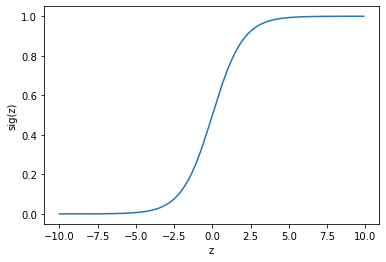

In [2]:
import numpy as np
import matplotlib.pyplot as plt

z_n = np.arange(-10,10,step=0.1)
sig_z = 1/(1+np.exp(-z_n))

plt.figure()
plt.plot(z_n,sig_z)
plt.xlabel('z')
plt.ylabel('sig(z)')
plt.show()

Note!!! The function output values $sig(z)$ are bounded between 0 and 1.

<h2>2. Logistic regression: Concept</h2>

 Logistic regression is a classification algorithm that works by trying to learn a function that approximates P(Y|X)

It makes the assumption that P(Y|X) can be <b>approximated as a sigmoid function applied to a linear combination</b> of input features.

$$ P(Y=1|X=x) = \sigma(z), z = \theta_0+\sum_{i=1}^{n}\theta_ix_i$$

$$ P(Y=1|X=x) = \frac{1}{1+e^{-(\theta_0+\theta_1x_1+\theta_2x_2+....+\theta_nx_n)}}$$

$$
   log(\frac{P}{1-P}) = \theta_0+\theta_1x_1+\theta_2x_2+....+\theta_nx_n
$$

This log function is called, the <b style="color:blue">logit function</b> measuring the odd of an event to occur over the odd it does not occur. It is approximated to be a <b style="color:blue">linear combination of features</b>.

The exact estimation of the logistic regression parameters are obtained using the <b>maximum likelihood estimation method</b> (not covered) leading to the obtention of the $\theta$ parameters that will build the <b>logistic function</b> or <b>classification model<b/>. 
 See this <a href="https://mlinsightscentral.com/index.php/logistic-regression/">link for insights</a>.

<h2>3. Python Implementation</h2>

<b>3.1. Feature/Target extraction</b>

In [3]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:9]#get features
y = df.iloc[:,[-1]]#get target variable
#X

<b>3.2. Feature Scaling</b>

In [4]:
from sklearn.preprocessing import StandardScaler

Sc = StandardScaler()
Sc.fit(X)
X_d = Sc.transform(X)

In [47]:
#X_d

<b>3.3. Training - Test Data Split</b>

In [5]:

X_train, X_test,y_train,y_test = train_test_split(X_d,y, test_size=0.2, random_state=1234)

<b>3.4 Model Building</b>

In [7]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

clf = LogisticRegression() #clf = classification
clf.fit(X_train,y_train) #fit the data: MLE (Maximum Likelhood Estimation method)

LogisticRegression()

<b>3.5 Classification predictions</b>

In [8]:
profile_x = np.array([6,148,72,35,0,33.6,0.627,50]).reshape(1,-1)
"""
Pregnancies=6
Glucose=148
BloodPressure=72
SkinThickness=35
Insulin=0
BMI=33.6
DiabetesPedigreeFunction=0.627
Age=50
"""

profile_x_sc  = Sc.transform(profile_x)#normalise the input

predicted_class = clf.predict(profile_x_sc)
prob_class = clf.predict_proba(profile_x_sc)

print('Predicted_class:',predicted_class[0], ' Probability: P(Y=1|X=x)=',prob_class[0][1])

Predicted_class: 1  Probability: P(Y=1|X=x)= 0.6698366979331125


<h2>4. Asssessing the Performance of a classification model</h2>

There are several metrics to verify the performance of a classification model starting with the <b>classification accuracy</b> and <b>confusion matrix<b/>.

<h3>4.1 The confusion matrix</h3>

The confusion matrix is a matrix that records the performance of a classification model on several terms.

<img src="media/cm.png" width="500px"/>

<ul>
<li>The <b>True Positive</b> is the number of data observations that had a class of 1 and that were correctly classified as 1.</li>
 <li>The <b>True Negative</b> is the number of data observations that had a class of 0 and that were correctly classified as 0.</li>
    <li>The <b>False Positive</b> is the number of data observations that had a class of 0 and that were wrongly classified as 1.</li>
    <li>The <b>False Negative</b> is the number of data observations that had a class of 1 and that were wrongly classified as 0.</li>
</ul>

<h3>4.1.1 Classification Accuracy</h3>

The classification accuracy is the proportion of correct predictions made by the model out of all data records.<br/><br/>
$$
 Classification\text{ }Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$

<h3>4.1.2 Recall</h3>

$$
Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}
$$

Recall, also known as <b style="color:blue">sensitivity</b> or true positive rate, measures This tells the <b>ability of a model to classify the instances of a particular class correctly</b>.

<h3>4.1.3 Precision</h3>

$$
Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} 
$$

Precision measures the accuracy of predictions made by the model.  Precision indicates how <b style="color:blue">confident</b> we can be that it is actually positive. It is calculated as the ratio of true positive predictions to the total number of positive predictions made by the model. Precision answers the question: "Of all the instances predicted as positive, how many were actually positive?" It can also be applied to negative outcomes.

<h3>4.1.4 F1 score</h3>

 $$
 F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }
 $$

The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. The F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It incentivise model with good (balanced) precision and recall and penalises models with imbalanced precision and recall values.

<b style="color:blue"> A good model must classify all classes equally well (recall) and misclassify as little as possible (precision) </b>

<h3>4.2. Python Implementation</h3>

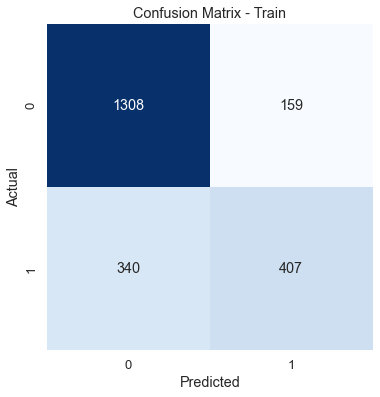

Training-set- classification accuracy: 0.7746160794941283


In [51]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

y_pred_train = clf.predict(X_train)

# Create confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_train)
class_acc_train = (cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[0][1]+cm_train[1][0]+cm_train[1][1])

# Create heatmap - Test set
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train')
plt.show()

print('Training-set- classification accuracy:',class_acc_train)

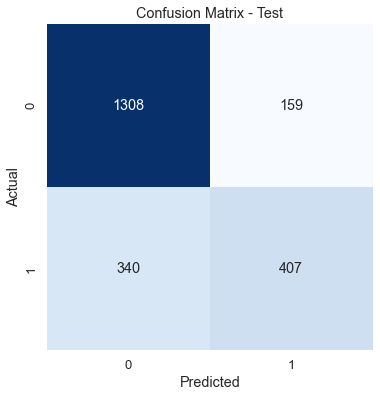

Test-set- classification accuracy: 0.7851985559566786


In [52]:


y_pred_test = clf.predict(X_test)
# Create confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)
class_acc_test = (cm_test[0][0]+cm_test[1][1])/(cm_test[0][0]+cm_test[0][1]+cm_test[1][0]+cm_test[1][1])

# Create heatmap - Test set
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test')
plt.show()

print('Test-set- classification accuracy:',class_acc_test)

In [56]:
from sklearn.metrics import classification_report
targets = ['no-diabetes','has-diabetes']

print(classification_report(y_test,y_pred_test,target_names=targets))

              precision    recall  f1-score   support

 no-diabetes       0.77      0.94      0.85       349
has-diabetes       0.83      0.53      0.64       205

    accuracy                           0.79       554
   macro avg       0.80      0.73      0.75       554
weighted avg       0.79      0.79      0.77       554



In [ ]:
#----> 
#HIV = 90% | 10%
#CreditLoan = 90% | 10%
#Flu = 70%  | 30%
#Fault in Airplane = (90%) | 10%
#---->

<h2>5. Improving the performance of a model</h2>

Tips to improve the performance of a model:
<ul>
    <li>Normalise or standardise your features</li>
    <li>Perform feature selection</li>
    <li>Class data equalisation</li>
    <li>Hyperparameter tuning (if possible)</li>
</ul>